In [44]:
# importing packages & reading in data
import pandas as pd
import matplotlib.pyplot as plt
#Data is from Houston
houston = pd.read_csv('police.csv')
houston.head()

,raw_row_number,date,location,lat,lng,beat,district,subject_race,subject_sex,type,violation,citation_issued,outcome,speed,posted_speed,vehicle_color,vehicle_make,vehicle_model,raw_race
0,1326617,2016-11-06,& 1,NaN,NaN,NaN,NaN,asian/pacific islander,female,vehicular,SPEEDING /30 (DISTANCE BETWEEN BLOCKS) (URBAN ...,True,citation,66.0,65.0,DBL,FORD,CROW,Asian
1,1326486,2016-11-06,0 B,29.940282,-95.397341,22B20,22.0,asian/pacific islander,female,vehicular,SPEEDING/HOBBY AIRPORT DISTANCE BETWEEN BLOCKS,True,citation,1.0,30.0,DGR,FORD,CROW,Asian
2,644326|644514|645250,2015-04-07,"10100 KATY FWY, NORTH SERVICE RD",29.776392,-95.387305,2A40,2.0,white,male,vehicular,CHANGING LANES NOT IN SAFETY - ACCIDENT|FAILUR...,True,citation,NaN,NaN,BLK,HONDA,ACCORD,White
3,1103613,2016-05-01,"10300 NORTH FWY, WEST SERVICE RD",29.860205,-95.332956,7C40,7.0,white,female,vehicular,ALLOW CHILD UNDER 17 (AGE 8 TO 16) TO RIDE IN ...,True,citation,NaN,NaN,WHI,FORD,ESCORT,White
4,1473792|1474045,2017-03-23,IH 610 (N LOOP ) AND HIRSCH RD,29.813210,-95.374346,3B50,3.0,white,male,vehicular,SPEEDING/ON STREET OR FREEWAY DISTANCE BETWEE...,True,citation,NaN,NaN,BLU,DODG,PK,White


In [3]:
#Examining null data
houston.isnull()

,raw_row_number,date,location,lat,lng,beat,district,subject_race,subject_sex,type,violation,citation_issued,outcome,speed,posted_speed,vehicle_color,vehicle_make,vehicle_model,raw_race
0,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375915,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1375916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1375917,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1375918,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


In [4]:
houston.isnull().sum()

raw_row_number          0
date                    0
location           108761
lat                113674
lng                113674
beat               186113
district           186113
subject_race       235788
subject_sex          4913
type                    0
violation               0
citation_issued         0
outcome                 0
speed              963961
posted_speed       951358
vehicle_color       51385
vehicle_make        21643
vehicle_model       44148
raw_race           235788
dtype: int64

In [6]:
#Helps us evaluate to see if we have a column with all null values
houston.shape

(1375920, 19)

In [18]:
#drop columns not needed
houston.drop('raw_row_number',axis='columns', inplace=True)

In [19]:
Examine data to check for removed columns
houston.head()

,date,location,lat,lng,district,subject_race,subject_sex,type,violation,citation_issued,outcome,vehicle_color,vehicle_make,vehicle_model,raw_race
0,2016-11-06,& 1,NaN,NaN,NaN,asian/pacific islander,female,vehicular,SPEEDING /30 (DISTANCE BETWEEN BLOCKS) (URBAN ...,True,citation,DBL,FORD,CROW,Asian
1,2016-11-06,0 B,29.940282,-95.397341,22.0,asian/pacific islander,female,vehicular,SPEEDING/HOBBY AIRPORT DISTANCE BETWEEN BLOCKS,True,citation,DGR,FORD,CROW,Asian
2,2015-04-07,"10100 KATY FWY, NORTH SERVICE RD",29.776392,-95.387305,2.0,white,male,vehicular,CHANGING LANES NOT IN SAFETY - ACCIDENT|FAILUR...,True,citation,BLK,HONDA,ACCORD,White
3,2016-05-01,"10300 NORTH FWY, WEST SERVICE RD",29.860205,-95.332956,7.0,white,female,vehicular,ALLOW CHILD UNDER 17 (AGE 8 TO 16) TO RIDE IN ...,True,citation,WHI,FORD,ESCORT,White
4,2017-03-23,IH 610 (N LOOP ) AND HIRSCH RD,29.813210,-95.374346,3.0,white,male,vehicular,SPEEDING/ON STREET OR FREEWAY DISTANCE BETWEE...,True,citation,BLU,DODG,PK,White


In [20]:
#Examine the datatypes
houston.dtypes

date                object
location            object
lat                float64
lng                float64
district           float64
subject_race        object
subject_sex         object
type                object
violation           object
citation_issued       bool
outcome             object
vehicle_color       object
vehicle_make        object
vehicle_model       object
raw_race            object
dtype: object

In [23]:
#Convert Date from  object to datetime
houston.date = pd.to_datetime(houston.date)

In [24]:
#Confirm the change
houston.dtypes

date               datetime64[ns]
location                   object
lat                       float64
lng                       float64
district                  float64
subject_race               object
subject_sex                object
type                       object
violation                  object
citation_issued              bool
outcome                    object
vehicle_color              object
vehicle_make               object
vehicle_model              object
raw_race                   object
dtype: object

In [25]:
#set the date as the index
houston.set_index('date', inplace=True)
houston.head()

,location,lat,lng,district,subject_race,subject_sex,type,violation,citation_issued,outcome,vehicle_color,vehicle_make,vehicle_model,raw_race
date,,,,,,,,,,,,,,
2016-11-06,& 1,NaN,NaN,NaN,asian/pacific islander,female,vehicular,SPEEDING /30 (DISTANCE BETWEEN BLOCKS) (URBAN ...,True,citation,DBL,FORD,CROW,Asian
2016-11-06,0 B,29.940282,-95.397341,22.0,asian/pacific islander,female,vehicular,SPEEDING/HOBBY AIRPORT DISTANCE BETWEEN BLOCKS,True,citation,DGR,FORD,CROW,Asian
2015-04-07,"10100 KATY FWY, NORTH SERVICE RD",29.776392,-95.387305,2.0,white,male,vehicular,CHANGING LANES NOT IN SAFETY - ACCIDENT|FAILUR...,True,citation,BLK,HONDA,ACCORD,White
2016-05-01,"10300 NORTH FWY, WEST SERVICE RD",29.860205,-95.332956,7.0,white,female,vehicular,ALLOW CHILD UNDER 17 (AGE 8 TO 16) TO RIDE IN ...,True,citation,WHI,FORD,ESCORT,White
2017-03-23,IH 610 (N LOOP ) AND HIRSCH RD,29.813210,-95.374346,3.0,white,male,vehicular,SPEEDING/ON STREET OR FREEWAY DISTANCE BETWEE...,True,citation,BLU,DODG,PK,White


In [27]:
#Examine all violations being commited
print(houston.violation.value_counts(normalize=True))

SPEEDING/ON STREET OR FREEWAY  DISTANCE BETWEEN STREETS                                                                                                                                                                                                                               8.661477e-02
SPEEDING (DISTANCE BETWEEN BLOCKS)                                                                                                                                                                                                                                                    6.451901e-02
SPEEDING (DISTANCE BETWEEN MILE POST# & MILE POST# )                                                                                                                                                                                                                                  5.436217e-02
FAIL TO CONTROL SPEED COLLIDE WITH ANOTHER VEHICLE                                                                             

In [35]:
#Examining Male vs Female record
male = houston[houston.subject_sex == 'male']
female = houston[houston.subject_sex == 'female']
print(male.outcome.value_counts(normalize=True))
print(female.outcome.value_counts(normalize=True))

citation    1.0
Name: outcome, dtype: float64
citation    1.0
Name: outcome, dtype: float64


In [36]:
#Check races stopped
print(houston.raw_race.value_counts(normalize=True))

White               0.583294
Black               0.350773
Unknown             0.037874
Asian               0.025899
American Indian     0.001306
Pacific Islander    0.000854
Name: raw_race, dtype: float64


In [37]:
#check stops by gender
print(houston.subject_sex.value_counts(normalize=True))

male      0.653769
female    0.346231
Name: subject_sex, dtype: float64


In [41]:
#Check if citation issued
print(houston.citation_issued.value_counts(normalize=True))

True    1.0
Name: citation_issued, dtype: float64


In [43]:
#calculate gender breakdown in stops by race and if citation issued
print(houston.groupby(['subject_sex', 'raw_race']).citation_issued.mean())

subject_sex  raw_race        
female       American Indian     True
             Asian               True
             Black               True
             Pacific Islander    True
             Unknown             True
             White               True
male         American Indian     True
             Asian               True
             Black               True
             Pacific Islander    True
             Unknown             True
             White               True
Name: citation_issued, dtype: bool


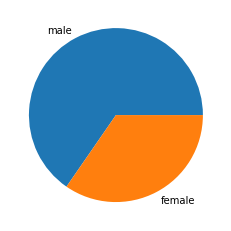

In [49]:
#pie chart demonstrating stops by gender
plt.pie(houston.subject_sex.value_counts(normalize=True), explode=None, labels=['male','female'],colors=None)
plt.show()
#male - 0.653769
#female - 0.346231

In [ ]:
houston.district.plot(kind='bar')
plt.show()